In [137]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from torch.autograd import Variable
from keras.utils import to_categorical

## loading in the data

In [164]:
iris = pd.read_csv("iris.csv")
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
iris["species"] = iris["species"].apply(lambda x: mappings[x])

In [165]:
X = iris.drop("species",axis=1).values
y = iris["species"].values
input_size = X.shape[-1]
cats = np.sum(np.unique(y)).astype(int)
print('Number of samples:', X.shape[0])    # 150
print('Number of attributes:', input_size) # 4
print('Number of categories:', cats)       # 3

Number of samples: 150
Number of attributes: 4
Number of categories: 3


<ipython-input-166-969110400b05>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);


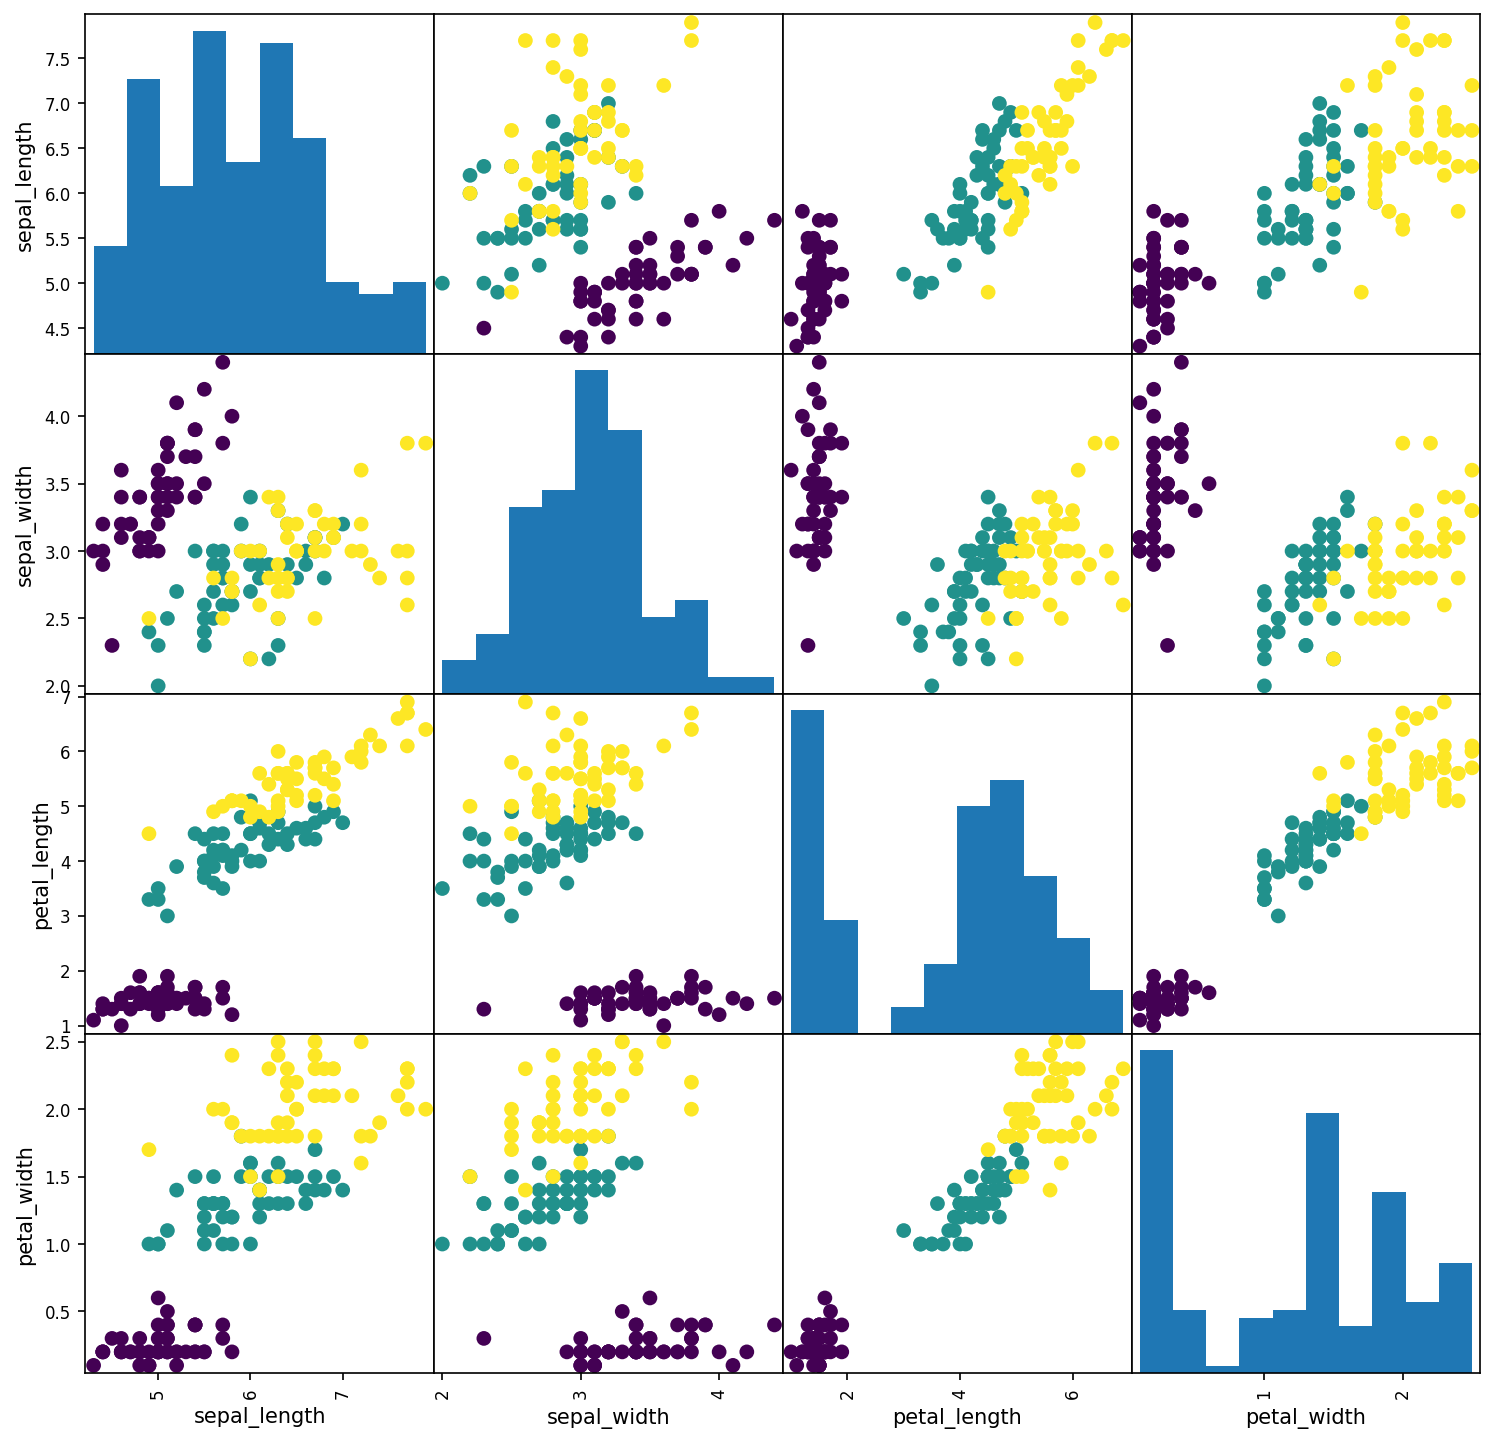

In [166]:
df = iris.iloc[:,0:4]
fig, ax = plt.subplots(figsize=(12,12), dpi=150)
pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);

## splitting into train/test, creating tensors

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print("X Train: ", X_train.shape)
print("X Test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X Train:  torch.Size([120, 4])
X Test:  torch.Size([30, 4])
y train:  torch.Size([120])
y test:  torch.Size([30])


In [174]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=8, hidden_layer2=12, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

In [175]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [176]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## model training 

In [179]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    # backprop, updating weights and biases 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 0.22526430
epoch:  1  loss: 0.21580850
epoch:  2  loss: 0.20648916
epoch:  3  loss: 0.19756737
epoch:  4  loss: 0.18890125
epoch:  5  loss: 0.18065938
epoch:  6  loss: 0.17283605
epoch:  7  loss: 0.16531563
epoch:  8  loss: 0.15839602
epoch:  9  loss: 0.15183695
epoch: 10  loss: 0.14573509
epoch: 11  loss: 0.14003152
epoch: 12  loss: 0.13467199
epoch: 13  loss: 0.12971817
epoch: 14  loss: 0.12500878
epoch: 15  loss: 0.12065741
epoch: 16  loss: 0.11649652
epoch: 17  loss: 0.11261023
epoch: 18  loss: 0.10888693
epoch: 19  loss: 0.10537899
epoch: 20  loss: 0.10203729
epoch: 21  loss: 0.09885630
epoch: 22  loss: 0.09584073
epoch: 23  loss: 0.09296442
epoch: 24  loss: 0.09025466
epoch: 25  loss: 0.08767226
epoch: 26  loss: 0.08524965
epoch: 27  loss: 0.08293837
epoch: 28  loss: 0.08076917
epoch: 29  loss: 0.07869707
epoch: 30  loss: 0.07674606
epoch: 31  loss: 0.07487979
epoch: 32  loss: 0.07311638
epoch: 33  loss: 0.07142839
epoch: 34  loss: 0.06982823
epoch: 35  loss: 0.0

## model evaluation 

In [181]:
X_test.data

tensor([[6.0000, 2.9000, 4.5000, 1.5000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.4000, 3.4000, 1.5000, 0

In [183]:
predict_out = Model(X_test)
_, predict_y = torch.max(predict_out, 1)

print('prediction accuracy', accuracy_score(y_test.data, predict_y.data))

print('macro precision', precision_score(y_test.data, predict_y.data, average='macro'))
print('micro precision', precision_score(y_test.data, predict_y.data, average='micro'))
print('macro recall', recall_score(y_test.data, predict_y.data, average='macro'))
print('micro recall', recall_score(y_test.data, predict_y.data, average='micro'))

TypeError: new(): argument 'size' must be tuple of ints, but found element of type Tensor at pos 2

In [178]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [128]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [130]:
df.head()

,Y,YHat,Correct
0,1,1,1
1,2,2,1
2,1,1,1
3,1,1,1
4,0,0,1


In [129]:
df['Correct'].sum() / len(df)

1.0

## on unknown data 

In [133]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])
with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])

tensor([ 11.2471,   5.5385, -15.5581])



NameError: name 'labels' is not defined